In [5]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
d = load_iris()
x = d.data
y = d.target

print(d.data.shape)
pca = PCA(n_components=2, whiten=True)
pca.fit(x)

(150, 4)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [7]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [9]:
x_pca = pca.explained_variance_ratio_
x_pca.shape

(2,)

(300, 4096) (100, 4096)


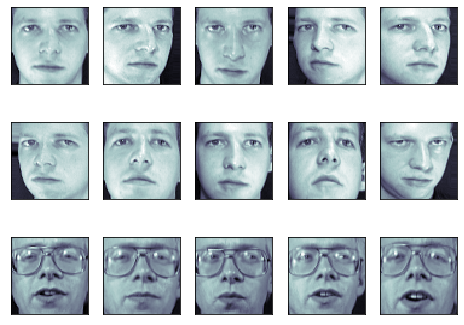

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import metrics
from sklearn import svm
faces =datasets. fetch_olivetti_faces()
fig = plt.figure(figsize=(8,6))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks=[], yticks=[])
    ax.imshow(faces.images[i],cmap=plt.cm.bone)
x_train, x_test,y_train,y_test = train_test_split(faces.data, faces.target,random_state=0)
print(x_train.shape,x_test.shape)
pca = decomposition.PCA(n_components=150, whiten = True)
pca.fit(x_train)
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)
print(pca.components_.shape)

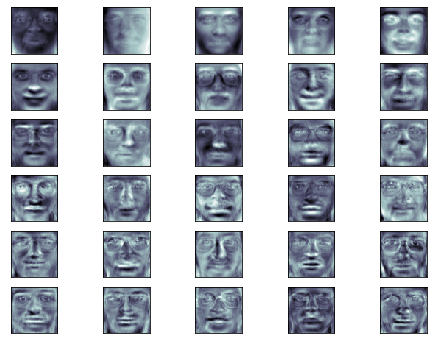

In [40]:
fig = plt.figure(figsize =(8,6))
for i in range(30):
    ax = fig.add_subplot(6,5,i+1,xticks=[],yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [18]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(300, 150)
(100, 150)


In [41]:
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(x_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

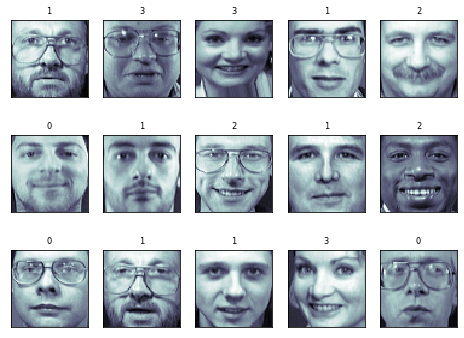

In [42]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(x_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)

In [43]:
y_pred = clf.predict(x_test_pca)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

In [24]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[6 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
